In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))
from db import helper as db_helper
from common import treat_data
import pandas as pd

In [2]:
session = db_helper.start_session()
df = pd.read_sql_table('spot_rates', session.bind)

2019-05-04 12:11:39,670 INFO sqlalchemy.engine.base.Engine select version()
2019-05-04 12:11:39,671 INFO sqlalchemy.engine.base.Engine {}
2019-05-04 12:11:39,675 INFO sqlalchemy.engine.base.Engine select current_schema()
2019-05-04 12:11:39,676 INFO sqlalchemy.engine.base.Engine {}
2019-05-04 12:11:39,679 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-05-04 12:11:39,680 INFO sqlalchemy.engine.base.Engine {}
2019-05-04 12:11:39,682 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-05-04 12:11:39,685 INFO sqlalchemy.engine.base.Engine {}
2019-05-04 12:11:39,693 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2019-05-04 12:11:39,694 INFO sqlalchemy.engine.base.Engine {}
2019-05-04 12:11:39,697 INFO sqlalchemy.engine.base.Engine SELECT c.relname FROM pg_class c JOIN pg_namespace n ON n.oid = c.relnamespace WHERE n.nspname = %(schema)s AND c.relkind = 'r'
2019-05-04 12:

2019-05-04 12:11:39,791 INFO sqlalchemy.engine.base.Engine {}


/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [11]:
df.head()

,date,year,month,week,day,base_currency,target_currency_symbol,target_spot_rate
0,2007-05-31,2007,5,22,31,USD,AUD,1.2082
1,2007-05-31,2007,5,22,31,USD,CAD,1.0691
2,2007-05-31,2007,5,22,31,USD,Yuan,7.6450
3,2007-05-31,2007,5,22,31,USD,CYP,0.4336
4,2007-05-31,2007,5,22,31,USD,CZK,21.0323


In [4]:
df = treat_data(df)

In [12]:
df.head()

,date,year,month,week,day,base_currency,target_currency_symbol,target_spot_rate
0,2007-05-31,2007,5,22,31,USD,AUD,1.2082
1,2007-05-31,2007,5,22,31,USD,CAD,1.0691
2,2007-05-31,2007,5,22,31,USD,Yuan,7.6450
3,2007-05-31,2007,5,22,31,USD,CYP,0.4336
4,2007-05-31,2007,5,22,31,USD,CZK,21.0323


In [7]:
# Split DF by currency
gbp_df = df[(df['base_currency']=='GBP')]
usd_df = df[(df['base_currency']=='USD')]
eur_df = df[(df['base_currency']=='EUR')]

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

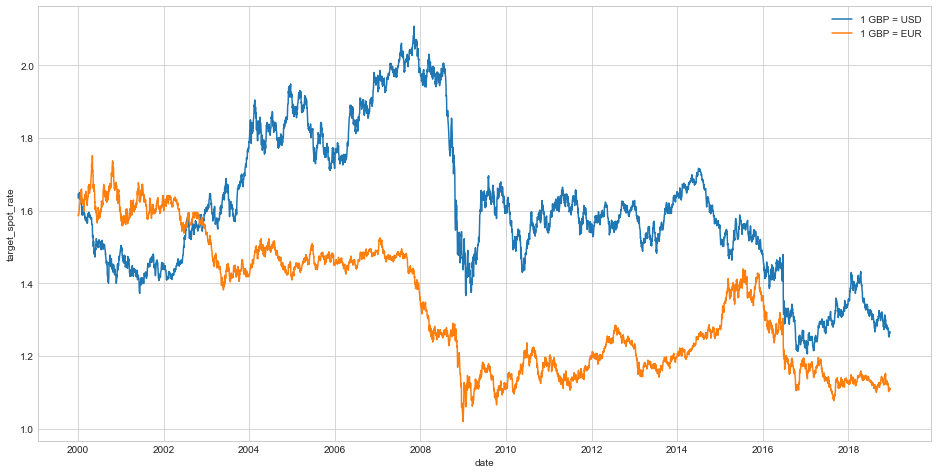

In [9]:
plt.figure(figsize=(16,8))
plt.style.use('seaborn-whitegrid')

gbp_usd = gbp_df[gbp_df['target_currency_symbol']=='USD']
gbp_eur = gbp_df[gbp_df['target_currency_symbol']=='EUR']
gbp_jpy = gbp_df[gbp_df['target_currency_symbol']=='JPY']

ax = sns.lineplot(x='date', y='target_spot_rate', data=gbp_usd, label='1 GBP = USD')
ax = sns.lineplot(x='date', y='target_spot_rate', data=gbp_eur, label='1 GBP = EUR')
# ax = sns.lineplot(x='date', y='target_spot_rate', data=gbp_jpy, label='1 GBP = JPY')

plt.show()

In [10]:
# This looks like the actually spot rates observed on xe.com

In [14]:
df.head()

,date,year,month,week,day,base_currency,target_currency_symbol,target_spot_rate
0,2007-05-31,2007,5,22,31,USD,AUD,1.2082
1,2007-05-31,2007,5,22,31,USD,CAD,1.0691
2,2007-05-31,2007,5,22,31,USD,Yuan,7.6450
3,2007-05-31,2007,5,22,31,USD,CYP,0.4336
4,2007-05-31,2007,5,22,31,USD,CZK,21.0323
